### Метод Ньютона для одного уравнения

In [4]:
#функция, реализующая метод Ньютона
def newton(f, a,b, EPS = 1e-6,trace = False,stm = ("auto",0)):
    #поиск точки, из которой можно начать
    ptst = newtonCheck(f,a,b)
    if(ptst == False):
        return false
    else:
        if(stm[0] == "auto"):
            start = ptst
        else:
            start = stm[1]
    
    #a и b задают границы отображаемого промежутка
    x1 = start
    count = 1
    p1 = plot(f(x),(a,b),title="${}$".format(y(x)))
    p1 += point((x1, 0), color="black", size=30, zorder=20)
    
    df = f.derivative()

    while (abs(f(x=x1)) >= EPS):
        if(trace and count < 7):
            if(f(x=x1) < 0):
                v1 = [(x1,y) for y in srange(f(x=x1),0,0.01)]
                if (x1 > (x1 - f(x=x1)/df(x=x1))):
                    v2 = [(a,a*df(x=x1) - (x1 - f(x=x1)/df(x=x1))*df(x=x1)) for a in srange(x1,x1 - f(x=x1)/df(x=x1),-0.01)]
                else:
                    v2 = [(a,a*df(x=x1) - (x1 - f(x=x1)/df(x=x1))*df(x=x1)) for a in srange(x1,x1 - f(x=x1)/df(x=x1),0.01)]
            else:
                v1 = [(x1,y) for y in srange(0,f(x=x1),0.01)]
                if (x1 > (x1 - f(x=x1)/df(x=x1))):
                    v2 = [(a,a*df(x=x1) - (x1 - f(x=x1)/df(x=x1))*df(x=x1)) for a in srange(x1,x1 - f(x=x1)/df(x=x1),-0.01)]
                else:
                    v2 = [(a,a*df(x=x1) - (x1 - f(x=x1)/df(x=x1))*df(x=x1)) for a in srange(x1,x1 - f(x=x1)/df(x=x1),0.01)]
            p1 += point((x1, 0), color="blue", size=5*count, zorder=20)
            p1 += line(v1,color="red",linestyle="--")
            p1 += line(v2,color="red",linestyle="--")
            
            
        x1 = x1 - f(x=x1)/df(x=x1)
        count+=1
        
        if(count > 1000):
            return false
    
    p1 += point((x1, 0), color="red", size=30, zorder=20)
    
    if(trace):
        p1.show()
        print("Итераций выполнено: {}".format(count))
    
    return (x1,count)

In [5]:
#проверяет, можно ли решить задачу методом ньютона, а также подбирает точку старта
def newtonCheck(f, a,b,steps = 50):
    df = f.derivative()
    d2f = df.derivative()
    if(f(x=a)*f(x=b) >= 0):
        return false
    for x in range(steps):
        start = a+x*(abs(b-a)/steps)
        if(f(x=start)*d2f(x=start) > 0):
            return start
    return false

In [6]:
y(x) = 2^x+x^2-2

show(y(x))

x^2 + 2^x - 2

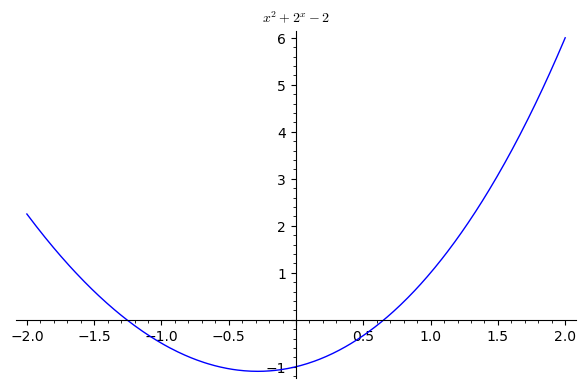

In [4]:
p1 = plot(y(x),(-2,2),title="${}$".format(y(x)))
p1.show()

'Шесть первых кадроыв поиска каждого из трех корней уравнения при помощи метода Ньютона'

'Корень 1:'

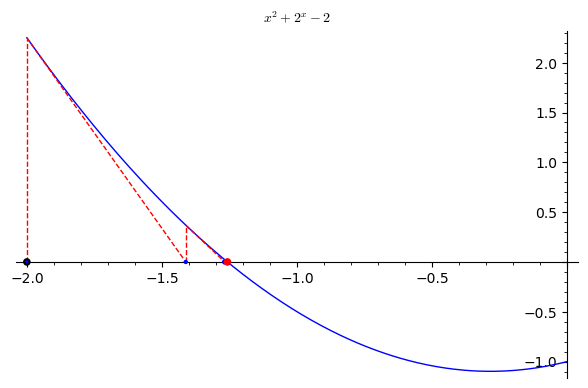

Итераций выполнено: 5


'Корень 2:'

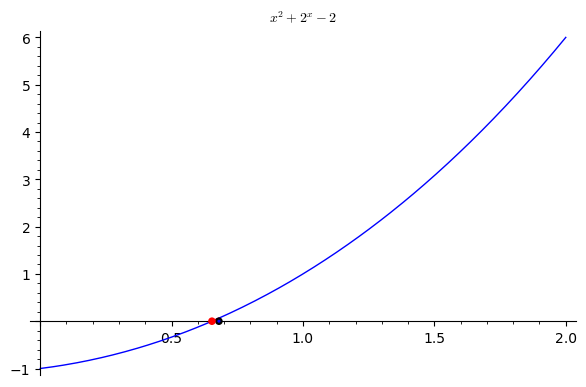

Итераций выполнено: 3


'Найденные корни:'

-1.2577
0.65348


'Корни на графике'

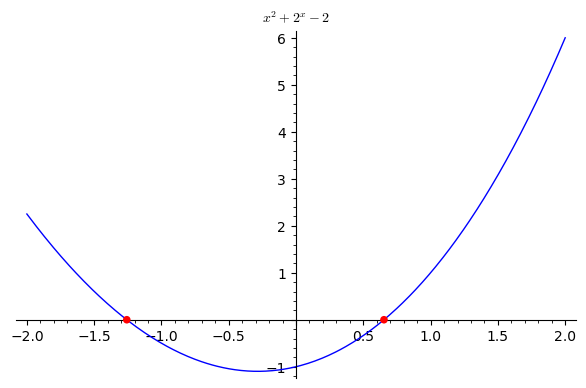

'Положительный корень на графике'

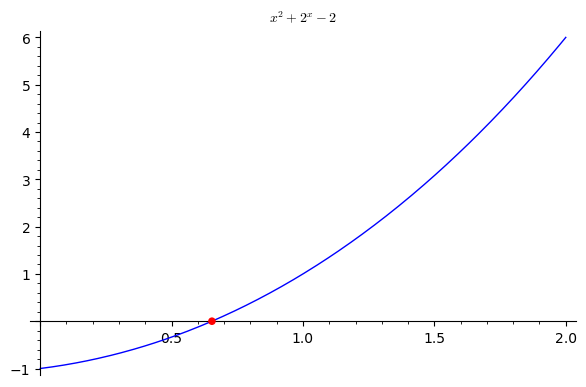

In [6]:
show("Шесть первых кадроыв поиска каждого из трех корней уравнения при помощи метода Ньютона")
EPS = 1e-6

show("Корень 1:")
xx1 = newton(y, -2, 0, EPS,true)[0]
    

show("Корень 2:")
xx2 = newton(y, 0, 2, EPS,true)[0]




show("Найденные корни:")
if(xx1 != False):
    print(xx1.n(digits = 5))
if(xx2 != False):
    print(xx2.n(digits = 5))
show("Корни на графике")

p1 = plot(y(x),(-2,2),title="${}$".format(y(x)))
if(xx1 != False):
    p1 += point((xx1, 0), color="red", size=30, zorder=20)
if(xx2 != False):
    p1 += point((xx2, 0), color="red", size=30, zorder=20)
p1.show()



show("Положительный корень на графике")

p1 = plot(y(x),(0,2),title="${}$".format(y(x)))
if(xx2 != False):
    p1 += point((xx2, 0), color="red", size=30, zorder=20)
p1.show()

##### Анализ зависимости погрешности от числа итераций

In [7]:
f1(x) = 2*(x+1)^3+x^2-3

show(f1(x))

2*(x + 1)^3 + x^2 - 3

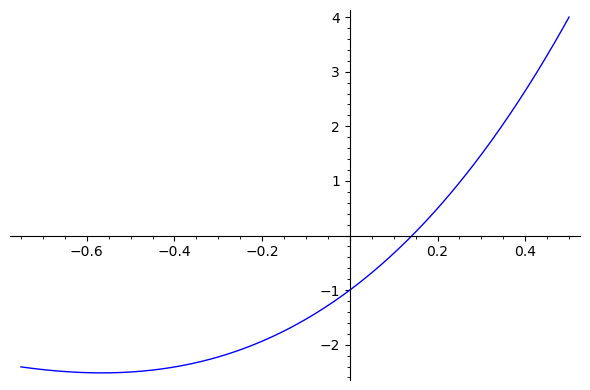

In [8]:
plot(f1,xmin = -0.75, xmax = 0.5)

In [9]:
show("Корень:")
(xx1,iternum) = newton(f1, 0, 0.5, 0.01,false,stm = ("my",0.5))
show(xx1)

'Корень:'

0.142171374394217

In [10]:
res = []
for i in range(1,16,1):
    prec = pow(10,-i)
    (xx1,iternum) = newton(f1, 0, 0.5, prec,false,stm = ("my",0.5))
    res.append((iternum,prec))

In [11]:
res

[(3, 1/10),
 (4, 1/100),
 (4, 1/1000),
 (5, 1/10000),
 (5, 1/100000),
 (5, 1/1000000),
 (5, 1/10000000),
 (5, 1/100000000),
 (6, 1/1000000000),
 (6, 1/10000000000),
 (6, 1/100000000000),
 (6, 1/1000000000000),
 (6, 1/10000000000000),
 (6, 1/100000000000000),
 (7, 1/1000000000000000)]

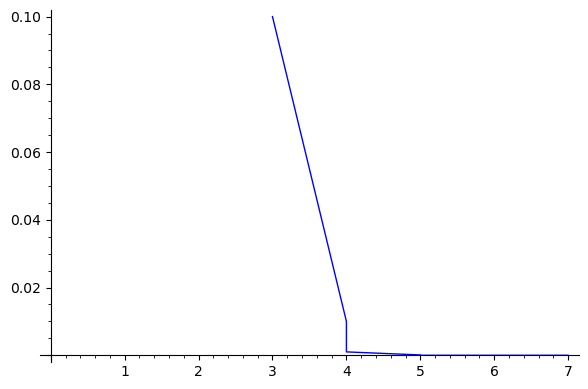

In [12]:
line(res,xmin = 0)

### Метод итераций для одного уравнения

In [11]:
y(x) = 2^x+x^2-2

show(y(x))

x^2 + 2^x - 2

In [12]:
phi(x) = sqrt(2 - 2**x)

In [13]:
show(phi(x))

sqrt(-2^x + 2)

In [14]:
Dphi = phi().derivative()

-1/2*2^x*log(2)/sqrt(-2^x + 2)

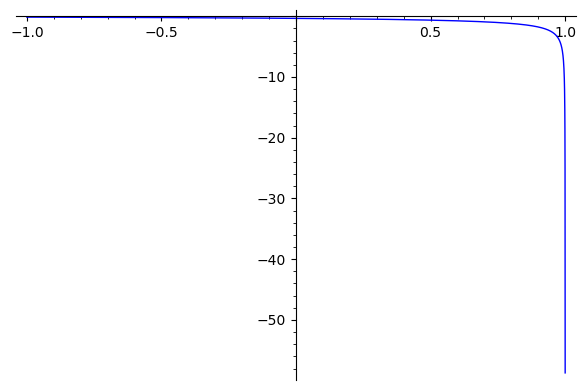

In [9]:
show(Dphi)
show(plot(Dphi))

Для x < 1 производная существует
Для x = 1 производная не существует  
Для x > 1 производная комплексная  
  
Уже известно, что все корени этого уравнения < 1.  

Численно найдем точку, в которой производная по модулю превзойдет 1

In [15]:
sol = newton(Dphi + 1,0.5,0.94)

/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


In [16]:
sol[0].n()

0.736771117574921

Подбором определяем отрезок, на котором метод применим

In [193]:
iterationsCheck(phi,0.57,0.73,trace = false)

True

In [13]:
def iterations(phi,a,b,eps =1e-10,trace = false,lim = 1000):
    if not iterationsCheck(phi,a,b):
        return false
    
    xcur = (a + b)/2
    xpast = xcur - 1
    q = maxabs(phi,a,b)
    delt = q/(1-q)
    
    i = 0
    while(delt*(abs(xpast - xcur)) > eps):
        xpast = xcur
        
        xcur = phi(xcur)
        i += 1
        if(i > lim):
            return false
        
        if(trace):
            print(xpast)
            print(xcur)
            print(delt*(abs(xpast - xcur)))
    return (xcur,i)

def iterationsCheck(phi,a,b,trace = false):
    Dphi = phi.derivative()
    for i in range (int(100*a),int(100*b)):
        cur = phi(i/100).n()
        if(trace):
            print(cur)
        if(cur < a or cur > b):
            return false
        if abs((Dphi(i/100)).n()) > 1 :
            return false
    return true

def maxabs(phi,a,b,trace = false):
    mx = 0
    Dphi = phi.derivative()
    for i in range (int(100*a),int(100*b)):
        cur = abs((Dphi(i/100)).n())
        
        if cur > 1 :
            return false
        if(cur > mx):
            mx = cur
        if(trace):
            print(cur)
    return mx

'Положительный корень:'

0.653480807582009

'Корень на графике'

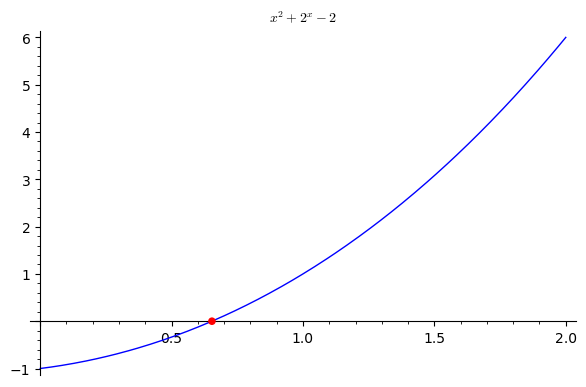

'Пройденно шагов:'

42

In [14]:
(rt,steps) = iterations(phi,0.57,0.73,eps =1e-4)

show("Положительный корень:")
show(rt)
show("Корень на графике")

p1 = plot(y(x),(0,2),title="${}$".format(y(x)))
if(rt != False):
    p1 += point((rt, y(rt)), color="red", size=30, zorder=20)
p1.show()

show("Пройденно шагов:")
show(steps)

##### Анализ зависимости погрешности от числа итераций

In [15]:
res = []
prec = 0.1
for i in range(1,16,1):
    (xx1,iternum) = iterations(phi, 0.57,0.73,eps = prec)
    res.append((iternum.n(),prec.n()))
    prec/=1.5

In [16]:
res

[(4.00000000000000, 0.100000000000000),
 (6.00000000000000, 0.0666666666666667),
 (8.00000000000000, 0.0444444444444444),
 (11.0000000000000, 0.0296296296296296),
 (13.0000000000000, 0.0197530864197531),
 (15.0000000000000, 0.0131687242798354),
 (17.0000000000000, 0.00877914951989026),
 (20.0000000000000, 0.00585276634659351),
 (22.0000000000000, 0.00390184423106234),
 (24.0000000000000, 0.00260122948737489),
 (26.0000000000000, 0.00173415299158326),
 (29.0000000000000, 0.00115610199438884),
 (31.0000000000000, 0.000770734662925894),
 (33.0000000000000, 0.000513823108617262),
 (35.0000000000000, 0.000342548739078175)]

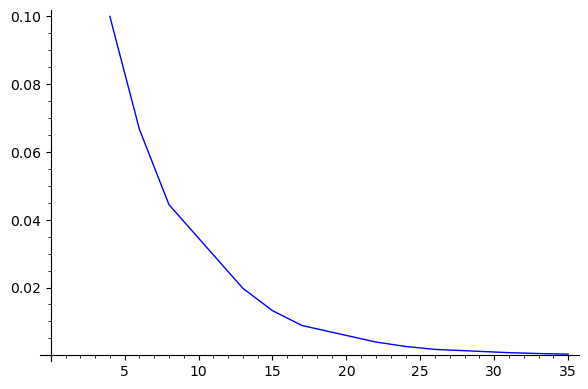

In [17]:
show(line(res,xmin = 0,ymax = 0.1))

### Метод Ньютона для системы уравнений

In [19]:
x,y, = var("x,y")
a = 2

In [20]:
f1 = x**2 + y**2 - a**2
f2 = x - exp(y) + a

In [21]:
show(f1)
show(f2)

x^2 + y^2 - 4

x - e^y + 2

In [22]:
show(plot3d(f1, (x,-5,5), (y,-5,5)) + plot3d(f2, (x,-5,5), (y,-5,5),color = "grey"))

Graphics3d Object

In [23]:
begApprox = vector((1,1))

In [24]:
funcs = vector((f1,f2))

In [25]:
def jacobi(A):
    mt = matrix(len(A))
    vecR = []
    for i in range(len(A)):
        vecR.append((A[i].derivative(x),A[i].derivative(y)))
    mt = matrix(vecR)
    return mt

In [26]:
def apply(vecF, #матрица, в которой содержатся функции
          vecX): #вектор вхлдных значений
    result = []
    #vector(len(vecX))
    for i in range(len(vecX)): 
         result.append(vecF[i](x = vecX[0],y = vecX[1]).n(digits = 100))
    return (result) #матрица результатов

In [27]:
def isZero(a,prec):
    if(a < prec and a > 0):
        return true
    else:
        if(a > prec and a < 0):
            return true
    return false    

def newthonMult(funcs,begApprox,silent = false,eps = 1e-10):
    appr = matrix(begApprox)
    if(not silent):
        print(appr)
    
    apprPst = appr - matrix((1,1))
    i = 0 
    limit = 1000
    while (not isZero((appr - apprPst),matrix((eps,eps)))):

        Ji = jacobi(funcs).inverse()
        if(Ji.det() == 0): #матрица Якоби вырождена
            return false
        
        apprPst = appr #значения на прошлом шаге
        r1 = apply(Ji,appr.list())
        
        r2 = apply(funcs,appr.list())
                
        #решаем слау, находим вектор приращений
        appr = appr - (matrix(r1) * matrix(r2).transpose()).transpose()
        
        if(not silent):
            print(appr)

        #предохранитель
        i+=1
        if(i > limit):
            return false
    return ((appr[0][0].n(digits = 10),appr[0][1].n(digits = 10)),i)

In [28]:
nr,iternum = newthonMult(funcs,(1,1),silent = true)
show("Найден корень: {}\nЗа {} итераций".format(nr,iternum))
show("f1(res) = {} f2(res) = {}".format(f1(nr[0],nr[1]).n(digits = 3),f2(nr[0],nr[1]).n(digits = 3)))

'Найден корень: (1.547991444, 1.266381653)\nЗа 5 итераций'

'f1(res) = -2.91e-11 f2(res) = 0.000'

In [29]:
show(plot3d(0,(x,-5,5), (y,-5,5),color = "black", opacity=0,mesh = true) +
     plot3d(f1, (x,-5,5), (y,-5,5),opacity=0.7) + 
     plot3d(f2, (x,-5,5), (y,-5,5),opacity=0.7,color = "grey") + 
     point((nr[0],nr[1],f1(nr[0],nr[1])),color = "red",size=100) +
     point((nr[0],nr[1],f2(nr[0],nr[1])),color = "red",size=100))

Graphics3d Object

#### Проверка зависимости точности от числа итераций

In [30]:
#это корень, который он вычисляет за 5 итераций
print(f1(1.5479914435766521961,1.2663816528256686727))
print(f2(1.5479914435766521961,1.2663816528256686727))

-1.626303258728256651e-19
1.355252715606880543e-19


In [31]:
res = []
prec = 2
for i in range(1,16,1):
    xx1,iternum = newthonMult(funcs,(1,1),silent = true,eps = prec)
    res.append((iternum.n(),prec.n()))
    prec/=2

In [32]:
res

[(0.000000000000000, 2.00000000000000),
 (1.00000000000000, 1.00000000000000),
 (5.00000000000000, 0.500000000000000),
 (5.00000000000000, 0.250000000000000),
 (5.00000000000000, 0.125000000000000),
 (5.00000000000000, 0.0625000000000000),
 (5.00000000000000, 0.0312500000000000),
 (5.00000000000000, 0.0156250000000000),
 (5.00000000000000, 0.00781250000000000),
 (5.00000000000000, 0.00390625000000000),
 (5.00000000000000, 0.00195312500000000),
 (5.00000000000000, 0.000976562500000000),
 (5.00000000000000, 0.000488281250000000),
 (5.00000000000000, 0.000244140625000000),
 (5.00000000000000, 0.000122070312500000)]

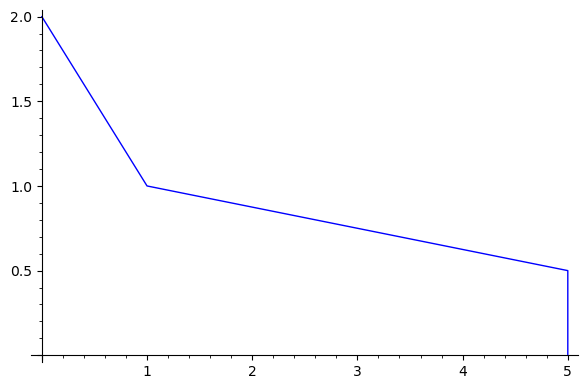

In [33]:
show(line(res,xmin = 0,ymax = 2))

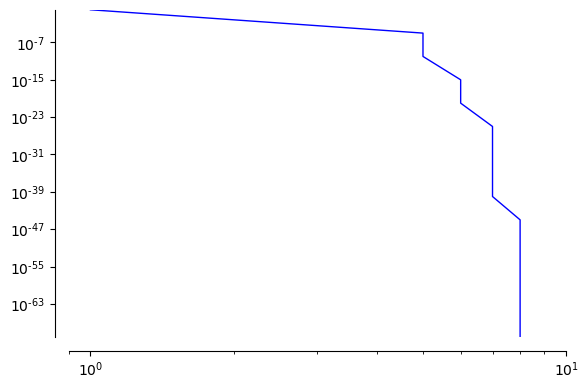

In [43]:
res = []
prec = 1
for i in range(1,16,1):
    xx1,iternum = newthonMult(funcs,(1,1),silent = true,eps = prec)
    res.append((iternum.n(),prec.n()))
    prec/=1e+5
    
show(line(res,scale = "loglog"))

### Метод итерации для системы уравнений

In [154]:
f1 = x**2 + y**2 - a**2
f2 = x - exp(y) + a

show(f1)
show(f2)

x^2 + y^2 - 4

x - e^y + 2

In [155]:
def phi2(x):
    if(x**2 > a**2):
        return -sqrt(a**2 + x**2)
    else:
        return sqrt(a**2 - x**2)
    
phi2 = -sqrt(a**2 - x**2)
phi1 = exp(y) - a

In [156]:
show(phi1)
show(phi2)

e^y - 2

-sqrt(-x^2 + 4)

In [114]:
def maxNorm(matr):
    maxSum = 0
    for a in matr:
        asum = 0
        for b in a:
            asum += abs(b)
        if(asum > maxSum):
            maxSum = asum
            
    return maxSum

def listn(lst):
    res = []
    for a in lst:
        rc = []
        for b in a:
            rc.append(b.n(digits = 4))
        res.append(rc)
    return res

In [188]:
def iterMultApplCh(phis,xmin,xmax,ymin,ymax):
    rs = 0
    der = jacobi(phis)
    for i in range(int(10*xmin),int(10*xmax)):
        for j in range(int(10*ymin),int(10*ymax)):
            dcur = apply(der,(i/10,j/10))
            
            #print(listn(dcur))
            #print(maxNorm(dcur).n(4))
            
            if(maxNorm(dcur) > 1):
                return false
            
            if(maxNorm(dcur) > rs):
                rs = maxNorm(dcur)
    return rs

In [151]:
def isZero(a,prec):
    if(a == 0):
        return true
    
    if(a < prec and a > 0):
        return true
    else:
        if(a > prec and a < 0):
            return true
    return false    

def iterMult(phis,begApprox,a,b,silent = false,eps = 1e-3):
    appr = matrix(begApprox)
    if(not silent):
        print(appr)
        
    q = iterMultApplCh(vector((phi1,phi2)), a[0],a[1],b[0],b[1])
    
    apprPst = appr - matrix((1,1))
    i = 0 
    limit = 1000
    while (not isZero((q/(1-q))*(appr - apprPst),matrix((eps,eps)))):

        apprPst = appr #значения на прошлом шаге
        
        r1 = apply(phis,appr.list())
                
        appr = matrix(r1)
        
        if(not silent):
            print(appr)            

            
            
        i+=1
        if(i > limit):
            print("limExt")
            return false
    return ((appr[0][0].n(digits = 10),appr[0][1].n(digits = 10)),i)

In [191]:
iterMultApplCh(vector((phi1,phi2)), -1.1,0,-1.7,0)

0.9048374180359595731642490594464366211947053609804009520562573170557799653442483610125034460360904572

In [189]:
nr,iternum = iterMult(vector((phi1,phi2)),(-1,-1),( -1.1,0),(-1.7,0),silent = true,eps = 1e-5)

In [190]:
show("Найден корень: {}\nЗа {} итераций".format(nr,iternum))
show("f1(res) = {} f2(res) = {}".format(f1(nr[0],nr[1]).n(digits = 3),f2(nr[0],nr[1]).n(digits = 3)))

'Найден корень: (-1.668200871, -1.103224141)\nЗа 39 итераций'

'f1(res) = -2.35e-6 f2(res) = -4.59e-7'

In [192]:
show(plot3d(0,(x,-5,5), (y,-5,5),color = "black", opacity=0,mesh = true) +
     plot3d(f1, (x,-5,5), (y,-5,5),opacity=0.7) + 
     plot3d(f2, (x,-5,5), (y,-5,5),opacity=0.7,color = "grey") + 
     point((nr[0],nr[1],f1(nr[0],nr[1])),color = "red",size=100) +
     point((nr[0],nr[1],f2(nr[0],nr[1])),color = "red",size=100))

Graphics3d Object

#### Проверка зависимости точности от числа итераций

In [65]:
res = []
prec = 0.1
for i in range(1,16,1):
    xx1,iternum = iterMult(vector((phi1,phi2)),(-1,-1),silent = true,eps = prec)
    res.append((iternum.n(),prec.n()))
    prec/=4

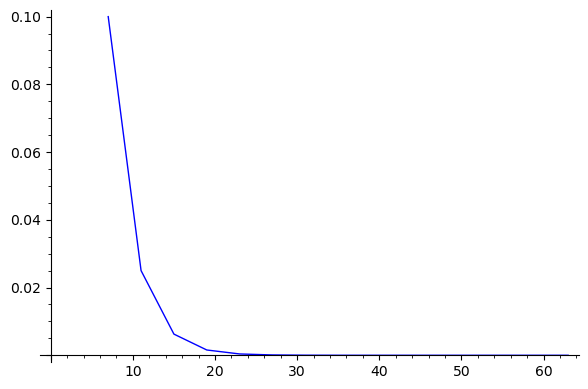

In [66]:
show(line(res,xmin = 0))